# Plotting Spectra

**Author:** Meagan Oakley  
**Date:** 10-11-2025  

The following script will apply a Gaussian function to broaden your IR spectrum:

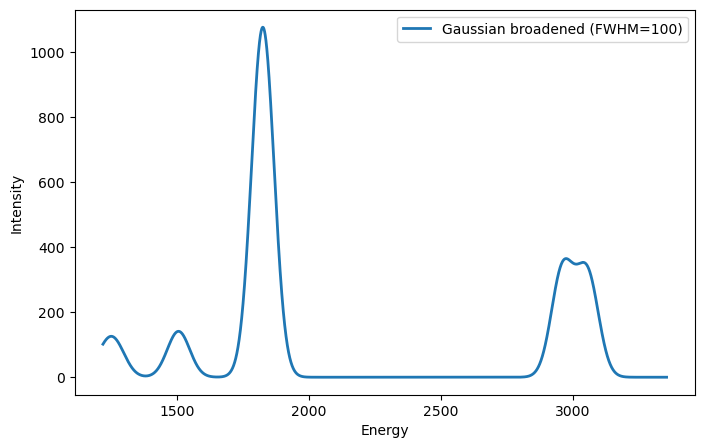

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#definition of the gaussian funciton
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))


# define broadening funciton
def gaussian_broadening(energy, intensity, fwhm, n_points=2000):

    # Convert FWHM to standard deviation
    energy_fine = np.linspace(energy.min() - 300, energy.max() + 300, n_points)
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

    broadened = np.zeros_like(energy_fine)

    
    for i in range(len(energy)):
        broadened += intensity[i] * gaussian(energy_fine, energy[i], sigma)
  
    broadened *= np.trapz(intensity, energy) / np.trapz(broadened, energy_fine)
    broadened /= np.max(broadened)

    return energy_fine, broadened



# How to use this script: 
# 1. Load your data (has two columns: energy intensity)
# CHANGE THIS FILE NAME
data = np.loadtxt('ir.dat', skiprows=6, usecols=(1, 3))
energy = data[:, 0]
intensity = data[:, 1]

# 2. Set the broadening - the larger this value the more broadened the spectrum
fwhm = 100

# don't change anything here:
energy_fine, broadened = gaussian_broadening(energy, intensity, fwhm, n_points=10000)
broadened /= np.max(broadened)

# 3. Plot results. Feel free to adjust the matplotlib parameters if you want. 
plt.figure(figsize=(8, 5))
plt.plot(energy_fine, broadened, label=f'Gaussian broadened (FWHM={fwhm})', linewidth=2)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.gca().invert_yaxis()
# 4. This next command saves your figure as filename IR.png. You can download this file on the lefthand 
# CHANGE THIS FILE NAME 
plt.savefig('IR.png', bbox_inches='tight')
plt.show()

In [ ]:
The following script will apply a Gaussian function to broaden your UV-vis spectrum:

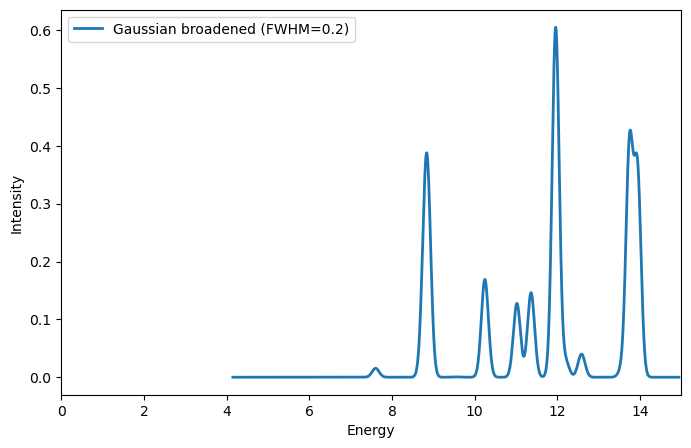

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#definition of the gaussian funciton
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))


# define broadening funciton
def gaussian_broadening(energy, intensity, fwhm, n_points=2000):

    # Convert FWHM to standard deviation
    energy_fine = np.linspace(energy.min() - 1, energy.max() + 1, n_points)
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

    broadened = np.zeros_like(energy_fine)

    
    for i in range(len(energy)):
        broadened += intensity[i] * gaussian(energy_fine, energy[i], sigma)
  
    broadened *= np.trapz(intensity, energy) / np.trapz(broadened, energy_fine)
    broadened /= np.max(broadened)

    return energy_fine, broadened



# How to use this script: 
# 1. Load your data (has two columns: energy intensity)
# CHANGE THIS FILE NAME 
data = np.loadtxt('abs.dat', skiprows=5, usecols=(3, 6))
energy = data[:, 0]
intensity = data[:, 1]

# 2. Set the broadening - the larger this value the more broadened the spectrum
fwhm = 0.5

# don't change anything here:
energy_fine, broadened = gaussian_broadening(energy, intensity, fwhm, n_points=10000)
broadened /= np.max(broadened)

# 3. Plot results. Feel free to adjust the matplotlib parameters if you want. 
plt.figure(figsize=(8, 5))
plt.plot(energy_fine, broadened, label=f'Gaussian broadened (FWHM={fwhm})', linewidth=2)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.xlim(0,15)
plt.legend()
# 4. This next command saves your figure as filename UVvis.png. You can download this file on the lefthand 
# CHAGNE THIS FILE NAME 
plt.savefig('UVvis.png', bbox_inches='tight')
plt.show()